In [55]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [3]:
# Read the data
ames = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [22]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [5]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-1.06163284e+22, -3.48125717e+19, -2.48916748e+20, -1.45271794e+21,
       -2.57752432e+21])

In [42]:
ridge = Ridge(alpha=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

r_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", ridge)]
)

In [39]:
cross_val_score(r_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.89813503, 0.91884118, 0.79440987, 0.78460862, 0.9152487 ])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted_pipeline = lr_pipeline_1.fit(X_train, y_train)
r_fitted_pipeline = r_pipeline_1.fit(X_train, y_train)

lr_coef = lr_fitted_pipeline.named_steps["linear_regression"].coef_
r_coef = r_fitted_pipeline.named_steps["ridge_regression"].coef_

coefs = pd.DataFrame({"lr": lr_coef, "r":r_coef})

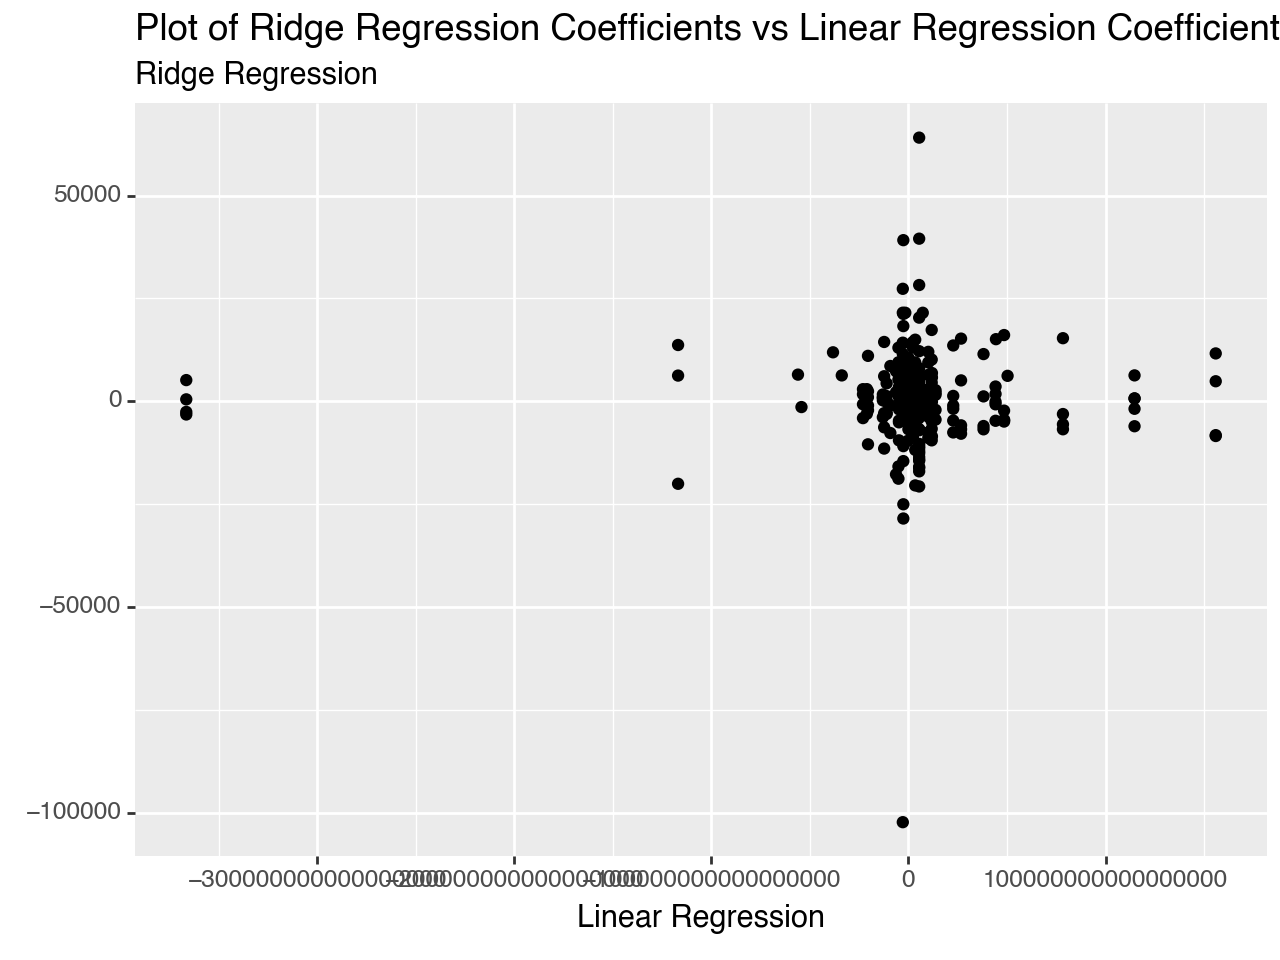

<Figure Size: (640 x 480)>

In [45]:
from plotnine import ggplot, aes, geom_point, labs
(ggplot(coefs, aes(x = "lr", y = "r")) +
    geom_point() +
    labs(
        x = "Linear Regression",
        y = "",
        subtitle = "Ridge Regression",
        title = "Plot of Ridge Regression Coefficients vs Linear Regression Coefficients"
    ))

In [72]:
alphas = {"ridge_regression__alpha": [.001, .01, .1, 1, 10]}

ridge = Ridge()

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

r_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", ridge)]
)

In [73]:
gscv = GridSearchCV(r_pipeline_1, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

In [74]:
gscv_fitted.cv_results_["mean_test_score"]

array([0.85294546, 0.85322362, 0.85542319, 0.86115931, 0.86335485])

In [78]:
alphas = {"lasso_regression__alpha": [.001, .01, .1, 1, 10]}

lasso = Lasso()

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", lasso)]
)

In [79]:
gscv = GridSearchCV(lasso_pipeline_1, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+11, tolerance: 1.348e+09
/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+11, tolerance: 1.474e+09
/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+11, tolerance: 1.463e+09
/Users/ben/anaconda3/lib/python3.11/site-packages/sk

In [80]:
gscv_fitted.cv_results_["mean_test_score"]

array([0.8544398 , 0.85454916, 0.85539429, 0.85589007, 0.85949508])

In [83]:
lasso = Lasso(alpha = 10)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", lasso)]
)

lasso_fitted_pipeline = lasso_pipeline_1.fit(X_train, y_train)

lasso_coef = lasso_fitted_pipeline.named_steps["lasso_regression"].coef_

lasso_coef

array([-8.93008434e+03,  2.85430090e+03, -0.00000000e+00,  0.00000000e+00,
        7.79715702e+02, -3.65191923e+03, -1.75802092e+03,  4.68202180e-11,
       -9.44186314e+02,  2.26144955e+03,  5.51979502e+03, -7.24898874e+01,
       -1.23091108e+04,  6.95941011e+03, -1.29922374e+04,  1.06518111e+02,
        6.29616016e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        5.36088455e+03, -6.38309287e+03, -4.45835402e+02,  3.65986844e+01,
       -0.00000000e+00,  7.24902876e+03, -2.57179355e+04,  5.58434889e+03,
        7.24343742e+03,  1.27447932e+04,  0.00000000e+00, -0.00000000e+00,
       -4.98760500e+03,  1.00884618e+04, -1.35860773e+04, -6.71951629e+03,
        8.39704562e+03,  1.16993132e+05, -5.61472107e+03,  0.00000000e+00,
        5.76214878e+03, -8.98101700e+03, -6.13450762e+03,  1.38632874e+04,
       -8.94732676e+03,  3.58890988e+04,  2.68176088e+04, -9.80282033e+03,
       -3.93000555e+03, -3.10024289e+03, -3.57402847e+03,  1.16727670e+04,
        4.71453927e+04, -

In [88]:
alphas = {"elastic_net__alpha": [.001, .01, .1, 1, 10], "elastic_net__l1_ratio": [.001, .01, .1, 1]}

en = ElasticNet()

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_net_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", en)]
)

In [89]:
gscv = GridSearchCV(elastic_net_pipeline_1, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.497e+11, tolerance: 1.348e+09
/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.277e+11, tolerance: 1.474e+09
/Users/ben/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.083e+11, tolerance: 1.463e+09
/Users/ben/anaconda3/lib/python3.11/site-packages/sk

In [90]:
gscv_fitted.cv_results_["mean_test_score"]

array([0.86238847, 0.862378  , 0.86226397, 0.8544398 , 0.86274543,
       0.86276019, 0.86290313, 0.85454916, 0.85133226, 0.85140795,
       0.85218856, 0.85539429, 0.81188059, 0.81220415, 0.81545555,
       0.85589007, 0.53808438, 0.5401286 , 0.56132712, 0.85949508])